<a href="https://colab.research.google.com/github/Stephen-Njuguna/Moringa_school_IP_Week-7/blob/main/Moringa_school_IP_Week_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Hass Consultancy Company - Housing Price Model**









## Defining the Question 

Create a model that would allow the company to accurately predict the sale of prices.  




## Defining Metrics of success


Being able to create a model that has an aaccuracy of more that 70% and Low mean absolute error and predicts houses sale of price.




## Understanding the Content 
Home prices are shaped by supply and demand, like any other economic asset, and may fluctuate based on subtle changes in your area's economy.Factors like but not limited to Location of the property, its size, age and condition and the supply and demand scenario in the micro-market affect the property's value.Pricing your houses with the right price is what makes a real estate company successful by attracting many clients because the prices are always right to fit the customer expectations and the economy.





## Recording the Experimental Design
1.   Importing the libraries
2.   Loading and viewing the dataset
3.   Cleaning the data.
4.   Univariate analysis
5.   Bivariate analysis
6.   Multivariate analysis


*   **Regression Analysis**
- Linear Regression
- Quantile Regression
- Ridge Regression
-Lasso Regression
- Elastic Net Regression



7. Conclusion and Recommendation

## Reading Data

In [105]:
#Import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [106]:
#Loading Datasets
df = pd.read_csv('house_data.csv')

## Checking Data

In [107]:
# Determining the no. of records in our dataset
#
df.shape

(21613, 20)

In [108]:
# Previewing the Dataset
df.head(1)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650


In [109]:
#checking dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

### Define the appropriateness of the available data
The dataset proovided is appropriate to answer the question because it has all the variables required for the house price predictor model creation

## Data Cleaning 

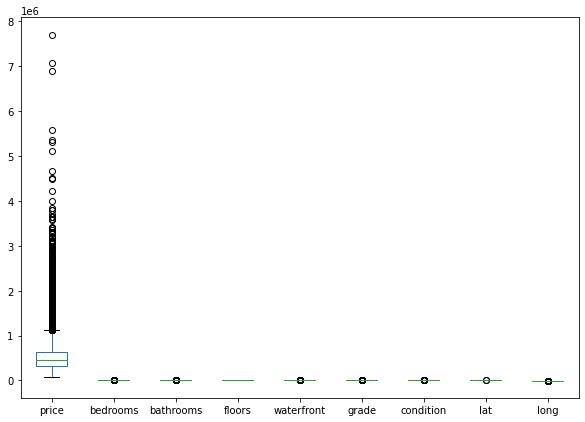

In [110]:
#checking for outliers 
df.boxplot(['price','bedrooms','bathrooms','floors','waterfront','grade','condition','lat','long'] , grid=False, figsize=[10,7])


Price has outliers because some houses are more expensive compared to others, so the shift in prices is what is caught as outliers. We can not do away with the outliers because they are part of our dataset.

In [111]:
#Checking for anomalies
for i in df.columns:
  print(df[i].unique())
  print('\n')

[7129300520 6414100192 5631500400 ... 1523300141  291310100 1523300157]


[221900. 538000. 180000. ... 541800. 610685. 402101.]


[ 3  2  4  5  1  6  7  0  8  9 11 10 33]


[1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 0.   1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75
 6.25 6.5 ]


[1180 2570  770 ... 3087 3118 1425]


[ 5650  7242 10000 ...  5813  2388  1076]


[1.  2.  1.5 3.  2.5 3.5]


[0 1]


[0 3 4 2 1]


[3 5 4 1 2]


[ 7  6  8 11  9  5 10 12  4  3 13  1]


[1180 2170  770 1050 1680 3890 1715 1060 1890 1860  860 1430 1370 1810
 1980 1600 1200 1250 2330 2270 1070 2450 1710 1750 1400  790 2570 2320
 1190 1510 1090 1280  930 2360  890 2620 2600 3595 1570  920 3160  990
 2290 2165 1640 1000 2130 2830 2250 2420 3250 1850 1590 1260 2519 1540
 1110 1770 2720 2240 3070 2380 2390  880 1040  910 3450 2350 1900 1010
  960 2660 1610  765 3520 1290 1960 1160 1210 1270 1440 2190 2920 1460
 1170 1240 3140 2030 2310  700 1080 2520 2780 1560 1450 172

In [112]:
#Checking for missing values 
df.isnull().sum().sum()

0

In [113]:
#Droping a column
df.drop(['id','zipcode'],axis=1,inplace=True)

## Exploratory Data Analysis

### Univeriate Analysis

In [115]:
#data Description 
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


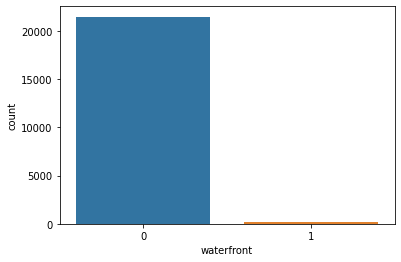

In [116]:
#Plotting a histogram showing houses with a waterfront
sns.countplot(df['waterfront'])
plt.show()

House that have no waterfront are sold more than the house a waterfront

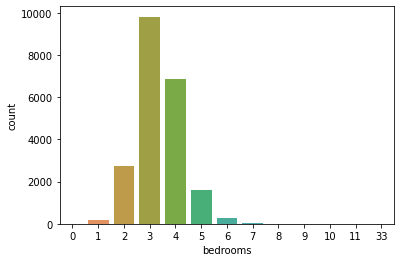

In [117]:
#Bar plot showing number of bedrooms 
sns.countplot(df['bedrooms'])
plt.show()

Houses with 3 bedroom are the most sold followed by houses with 4 bedroom. This are the houses that are  mostly attactive to buyers.The least sold houses are houses with 6,1 and 7 bedrooms

### Biavariate Analysis

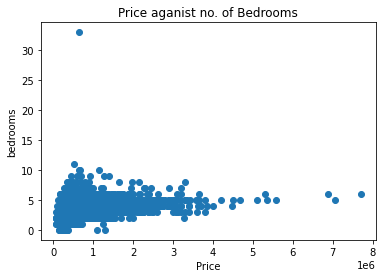

In [118]:
#Plot a scatter plot between price and no of bedrooms 
plt.scatter(df['price'], df['bedrooms'])
plt.xlabel("Price")
plt.ylabel("bedrooms")
plt.title("Price aganist no. of Bedrooms")
plt.show()

The is a strong relationship between the price of house and number of bedrooms

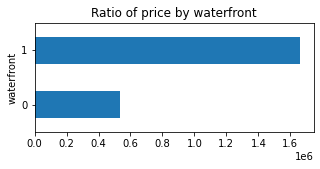

In [119]:
#Displace Ratio of price by waterfront
ratio = df.groupby('waterfront')['price'].mean()
ratio.plot.barh(figsize=(5,2), title='Ratio of price by waterfront')
plt.show()

Houses with a waterfront have a high price compared to houses without a waterfront 

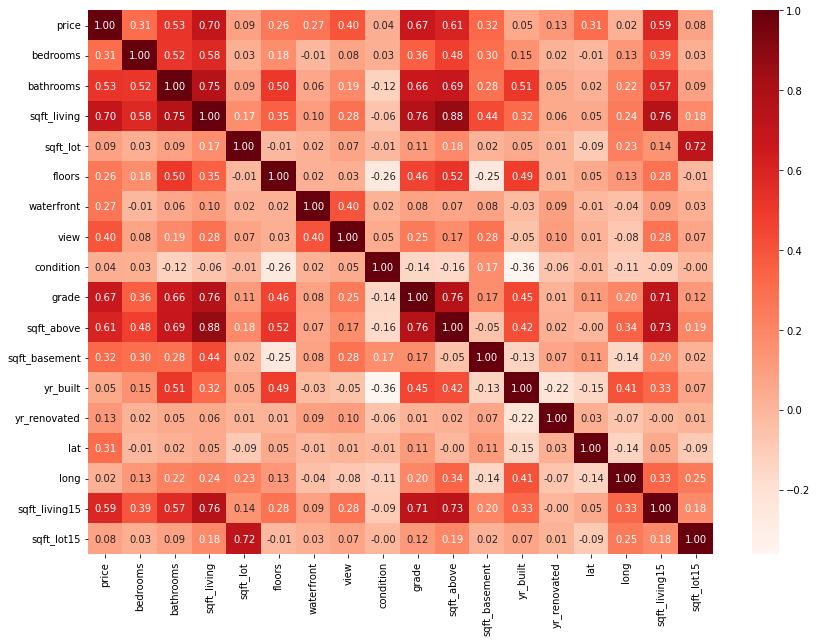

In [120]:
#Plotting a heat map to show correlation between the different variables
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True,cmap="Reds",fmt=".2f");
plt.show()



1.   There is a weak negative correlation bewteen floors and sqft_lot15
2.   There is a strong positive correlation between price and sqft_living.
3. There is weak positive correlation between long and sqft_above
4. There s strong positive correlation between grade and price.



### Multivariate Analysis

#### Performing Regression Analysis

#### Multiple Linear Reggression

In [121]:
#Prepare the Data and split to target and feature set 
X = df.drop('price',axis=1)
Y = df['price']

In [122]:
#check for multicollinearity 
independent_only = X.corr()
#computing the VIF
pd.DataFrame(np.linalg.inv(independent_only.values), index = independent_only.index, columns=independent_only.columns)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
bedrooms,1.648202,-0.463185,-1.907822e-01,0.049487,0.057925,0.062148,0.120891,-0.058540,0.303033,-7.023466e-01,-3.867043e-01,0.122118,0.043678,0.065639,-0.017980,0.015082,0.086147
bathrooms,-0.463185,3.349742,-5.068434e+00,-0.024062,-0.670781,0.009193,-0.038108,-0.141075,-0.270100,3.289314e+00,1.365679e+00,-0.942238,-0.260709,-0.033209,0.035599,0.086847,0.071861
sqft_living,-0.187973,-5.067275,-3.387473e+13,-0.122093,0.503602,0.454949,-0.609096,-0.350313,-0.778931,3.054236e+13,1.632343e+13,1.690044,0.068118,-0.004222,-0.060086,-0.965288,-0.188006
sqft_lot,0.049487,-0.024062,-1.241160e-01,2.102517,0.044994,0.027346,-0.059219,0.030814,-0.053721,-8.770332e-02,1.714336e-02,0.099166,0.021501,0.052882,-0.132009,0.164274,-1.459343
floors,0.057925,-0.670781,5.044721e-01,0.044994,1.994364,-0.002964,-0.055079,0.106241,-0.222291,-9.674841e-01,3.643542e-01,-0.455090,-0.076818,-0.159291,0.239472,0.294212,0.071066
waterfront,0.062148,0.009193,4.554872e-01,0.027346,-0.002964,1.203460,-0.490637,-0.014858,0.048109,-5.218530e-01,-2.221062e-01,-0.024535,-0.065903,0.014076,0.017480,0.051600,-0.018259
view,0.120891,-0.038108,-6.090504e-01,-0.059219,-0.055079,-0.490637,1.423253,-0.007826,-0.178185,5.826639e-01,3.008186e-02,0.173360,-0.037118,0.092409,0.133627,-0.307824,-0.008805
condition,-0.058540,-0.141075,-3.516944e-01,0.030814,0.106241,-0.014858,-0.007826,1.233829,-0.062538,3.799446e-01,7.974772e-02,0.536628,0.203097,0.093567,-0.078239,0.055467,-0.026750
grade,0.303033,-0.270100,-7.764858e-01,-0.053721,-0.222291,0.048109,-0.178185,-0.062538,3.412869,-9.062307e-01,-1.078122e-01,-0.651856,-0.073269,-0.315424,0.357043,-0.922139,0.072651
sqft_above,-0.702025,3.297442,3.054236e+13,-0.089401,-0.966142,-0.521263,0.582320,0.378760,-0.903598,-2.753782e+13,-1.471765e+13,-0.992104,-0.060663,0.170841,-0.254070,-0.655806,-0.006915


The VIF(varience Inflation factor) score for each variable is found alongside the downwards sloping diagonal.Most of the VIF score is below 3.5 which shows that there is moderate multicollinearity between the independent variables 

In [123]:
#split the dataset test and train 
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,Y, test_size = 0.3, random_state = 2)

#Import Linear Regresion
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()

#fit the model to train and test 
l_reg.fit(X_train,y_train)


LinearRegression()

In [124]:
# To see coefficients our regression model has chosen, execute the following
# 
coeff_df = pd.DataFrame(l_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
bedrooms,-32364.475260
bathrooms,41809.714369
sqft_living,107.789650
sqft_lot,0.106017
floors,4601.592674
waterfront,522219.778183
view,50062.154435
condition,33305.712242
grade,97271.581235
sqft_above,66.946077


Some observation but not limited to ;

1.  Holding all other features fixed, one unit increase in bathroom there is an increase of 41809.
2.  Holding all other features fixed, one unit increase in sqft_lot15 there is a decrease of 0.3.
3.  Holding all other feeatures fixed, one unit increase in lat there is increase of 570255.
4. Holding all other features fixed,one unit increase of grade there is an increase of 97271.




In [125]:
#Making prediction using our model
y_pred = l_reg.predict(X_test)

#Evaluation metrics of our model 
from sklearn import metrics
from sklearn.metrics import r2_score

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R_2 score :",r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 126019.25567793478
Root Mean Squared Error: 203612.2919482339
R_2 score : 0.7027500035931395


from the model evaluate metrics we have a MAE score of 126019 and R_2 score of 70% this shows that the model can interprate 68% of the dependent variablity.

In [126]:
#Residual plots and heteroskedasticity
residual = np.subtract(y_pred,y_test)
#Residual mean
r_mean = np.mean(residual)
r_mean

4138.799574552382

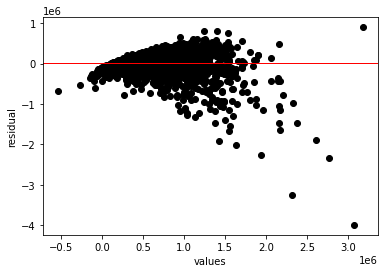

In [127]:
#plotting Residual plot 
import matplotlib.pyplot as plt

plt.scatter(y_pred, residual, color='black')
plt.ylabel('residual')
plt.xlabel('values')
plt.axhline(y= residual.mean(), color='red', linewidth=1)
plt.show()

There is a random pattern in the residual plot and the residual mean start from zero

In [128]:
#heteroskedasticity test using bartlett's test
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residual)


degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(p_value)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

2.725191733599012e-237
the variances are homogeneous!


#### Quantile Regression 

In [129]:
#Prepare the Data and split to target and feature set 
X = df.drop(['price','sqft_living'],axis=1)
Y = df['price']

In [130]:
## We will use the python package statsmodels for Quantile Regression
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")
#
qt = [0.25, 0.5, 0.75]
model = smf.quantreg('Y ~ X', data= df)
mod = model.fit(quantiles= qt)

#model summary 
print(mod.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      Y   Pseudo R-squared:               0.4612
Model:                       QuantReg   Bandwidth:                   1.963e+04
Method:                 Least Squares   Sparsity:                    2.662e+05
Date:                Sat, 27 Nov 2021   No. Observations:                21613
Time:                        11:32:22   Df Residuals:                    21596
                                        Df Model:                           16
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.7061      6.845      5.509      0.000      24.289      51.123
X[0]       -2.179e+04   1249.201    -17.441      0.000   -2.42e+04   -1.93e+04
X[1]        3.454e+04   2149.194     16.069      0.000    3.03e+04    3.87e+04
X[2]           0.1612      0.032      5.102      0.0

#### Lasso Regression 

In [131]:
#Prepare the Data and split to target and feature set 
X = df.drop('price',axis=1)
Y = df['price']

#standardize the independent variables 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
x = scaler.transform(X)

In [132]:
#Split to test and train
from sklearn.model_selection import train_test_split
X_train, X_test ,Y_train,Y_test = train_test_split(x,Y, test_size=0.3,random_state=2)

#Lasso Regression and set paramenter 
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
#
lasso = Lasso()
#Parameters
parameter = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
#Gridsearch
cv_lasso = GridSearchCV(lasso, parameter, scoring ='r2') 
#Fit model and get best alpha value 
cv_lasso.fit(X_train,y_train)
#best parameter 
print("lasso best parameters:", cv_lasso.best_params_) 
print("lasso score:", cv_lasso.score(X_test, Y_test))

print("lasso MSE:", metrics.mean_squared_error(Y_test, cv_lasso.predict(X_test)))

lasso best parameters: {'alpha': 24.0}
lasso score: 0.7027488262536394
lasso MSE: 41458129637.966705


In [133]:
#fit alpha value and fit model 
lasso = Lasso(alpha=24)
lasso.fit(X_train,Y_train)
#prediction
y_pred = lasso.predict(X_test)
#Model evaluation 
print("Mean Squared Error :", metrics.mean_squared_error(Y_test,y_pred))
print("Mean Absolute Error (MAE):",metrics.median_absolute_error(Y_test,y_pred))
print("R_2 score :",r2_score(Y_test, y_pred))
coeff_lasso = pd.DataFrame(lasso.coef_, X.columns, columns=['Coefficient'])
coeff_lasso

Mean Squared Error : 41458129637.966705
Mean Absolute Error (MAE): 89820.77521447212
R_2 score : 0.7027488262536394


,Coefficient
bedrooms,-30076.533726
bathrooms,32040.411947
sqft_living,200094.726849
sqft_lot,4310.198138
floors,2484.053879
waterfront,45160.745772
view,38369.188386
condition,21641.266495
grade,114394.716677
sqft_above,-35552.216245


Lasso Regression has a mean absolute error of 89856 that is lower than the linear regression Model of 126019. Lasso and Linear have same R2 score. 
Variables in lasso regression hace low coeffience compaired to linear regression model

#### Ridge Regression

In [134]:
#Prepare the Data and split to target and feature set 
X = df.drop('price',axis=1)
Y = df['price']
#split test and train 
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size= 0.3,random_state=2)

In [135]:
#Ridge regression and normalize in order get good estimates
from sklearn.linear_model import Ridge
ridge = Ridge(normalize=True)

#Grid search using 5 folds
from sklearn.model_selection import GridSearchCV
param = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=5)

In [136]:
#fit to model
param.fit(X_train,y_train)
#get best alpha and model score 
print("Best parameter :",param.best_params_)
print("Model score :",param.best_score_)

Best parameter : {'alpha': 0.01}
Model score : -41334209151.60602


In [137]:
#fit model with best alpha value to ridge 
r = Ridge(alpha= 0.01,normalize=True)
#fit train variables 
r.fit(X_train,y_train)
#predict 
y_pred = r.predict(X_test)
#Evaluate model get MAE and R2 score and Coeffience 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print("mean Squared Error (MSE):)", mean_squared_error(y_test, y_pred))
print("Mean absolute error (MAE) :",mean_absolute_error(y_test,y_pred))
print("R2 score :",r2_score(y_test,y_pred))
coeff_ridge = pd.DataFrame(r.coef_, X.columns, columns=['Coefficient'])
coeff_ridge

mean Squared Error (MSE):) 41496595402.14847
Mean absolute error (MAE) : 125734.00082500427
R2 score : 0.7024730300792358


,Coefficient
bedrooms,-31298.832174
bathrooms,41517.669266
sqft_living,85.763301
sqft_lot,0.105980
floors,5366.663516
waterfront,518121.063948
view,50210.006973
condition,33395.306822
grade,95370.380656
sqft_above,87.258821


Ridge regression MAE is 125734 about the same with the baaseline model which has an MAE of 126019.
It has and R2 score of 70%


#### Elastic Net Regression 

In [138]:
#Prepare the Data and split to target and feature set 
X = df.drop('price',axis=1)
Y = df['price']
#split test and train 
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size= 0.3,random_state=2)

In [139]:
#elastic Net regression and Normalize 
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(normalize = True)
#Create our Grid 
from sklearn.model_selection import GridSearchCV
#create grid parameters
result = GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=5)

In [140]:
#fit train to parameters
result.fit(X_train,y_train)
#evaluate and get best alpha value and l1 ratio
print('Parameters:',result.best_params_)
print("Best score :",result.best_score_)

Parameters: {'alpha': 1e-05, 'l1_ratio': 0.8}
Best score : -41347015720.9153


In [142]:
#fit alpha and l1 ratio 
elestic = ElasticNet(normalize=True,alpha=1e-05,l1_ratio=0.8)
#fit train values 
elestic.fit(X_train,y_train)
#predict 
y_pred = elestic.predict(X_test)
#Evaluate model performance get MAE ,R2 score and coeffience
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

print("MSE :", mean_squared_error(y_test,y_pred))
print("MAE :",mean_absolute_error(y_test,y_pred))
print("R2 Score :",r2_score(y_test,y_pred))
coeff_elastic = pd.DataFrame(elestic.coef_, X.columns, columns=['Coefficient'])
coeff_elastic

MSE : 41597752922.19358
MAE : 125238.45350396277
R2 Score : 0.7017477394829339


,Coefficient
bedrooms,-29263.836532
bathrooms,41026.396721
sqft_living,84.321002
sqft_lot,0.105336
floors,6747.966167
waterfront,510144.073609
view,50473.928267
condition,33478.567260
grade,91923.243000
sqft_above,85.416997


Elastic Net refression has an MAE of 125238 that a bit lower than the base line model. It also has an R2 score of 70%

## Conclusion

From the notebook Lasso regression have the Lowest mean abosulte error compared to all other regression based on the baseline model.We are comparing MAE because it robust to dataset with outliers and our dataset has outliers in the dependent variable due to some house having very high prices compared to others which is totaly normal.Lasso regression shinks coefficience of variables with low contribution to the model through l1 penalty.


## Recommendations.

Lasso regression is the best model to make house price prediction because it has a low mean absolute error(MAE) and accuracy rate of 70%